<font size=6><b> Setp02.샘플링

## 코랩 한글폰트 설치

* 설치 후 아래 코드 막고 "런타임 > 런타임 다시시작"


In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# import matplotlib as mpl  # 기본 설정 만지는 용도
# import matplotlib.pyplot as plt  # 그래프 그리는 용도
# import matplotlib.font_manager as fm  # 폰트 관련 용도

# print(mpl.__version__)
# print(mpl.__file__)
# print(mpl.get_configdir())
# print(mpl.get_cachedir())

# sys_font=fm.findSystemFonts()
# print(f"sys_font number: {len(sys_font)}")
# print(sys_font)

# nanum_font = [f for f in sys_font if 'Nanum' in f]
# print(f"nanum_font number: {len(nanum_font)}")
# print(nanum_font )

In [3]:
# import matplotlib.pyplot as plt
# path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)

# plt.rc('font', family='NanumMyeongjo')
# mpl.rcParams['axes.unicode_minus'] = False
# # fm._rebuild()

In [4]:
# plt.plot([1,2,3])
# plt.title('한글')
# plt.show()

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
# plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
# ----------------- 전처리  ----------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA


# ----------------- 모델  ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans, dbscan
from sklearn.pipeline import Pipeline
    
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
# from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
# from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

* ref : https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook

<pre>
Resampling
Random under-sampling
Random over-sampling
Python imbalanced-learn module
Random under-sampling and over-sampling with imbalanced-learn
Under-sampling: Tomek links
Under-sampling: Cluster Centroids
Over-sampling: SMOTE
Over-sampling followed by under-sampling

* ref : https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

<pre>
Outline:
I. Understanding our data

II. Preprocessing
a) Scaling and Distributing
b) Splitting the Data


III. Random UnderSampling and Oversampling
a) Distributing and Correlating
b) Anomaly Detection
c) Dimensionality Reduction and Clustering (t-SNE)
d) Classifiers
e) A Deeper Look into Logistic Regression
f) Oversampling with SMOTE


* ref : https://www.kaggle.com/code/shahules/tackling-class-imbalance


<pre>
The metric trap
Data preparating
Resampling
Resampling using sklearn
Dimensionality Reduction and Clustering
Python imbalanced-learn module

* ref : https://shinminyong.tistory.com/34

# Data Load

## 샘플 데이터 생성

In [7]:
import scipy as sp

In [8]:
n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

print(X_imb.shape, y_imb.shape )

(220, 2) (220,)


## 데이터 로드

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# /content/drive/MyDrive/DACON_CLS_TEL/dacon_2022_tel_cls/train.csv

In [11]:
train = pd.read_csv("./datasets/train.csv")
test  = pd.read_csv("./datasets/test.csv")
submit = pd.read_csv("./datasets/sample_submission.csv")

In [12]:
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [13]:
train = train.drop('ID', axis=1)
test  = test.drop('ID', axis=1)

In [14]:
train_c0_cnt, train_c1_cnt = train['전화해지여부'].value_counts()
print(train_c0_cnt, train_c1_cnt)

train_c0 = train[train['전화해지여부'] == 0]
train_c1 = train[train['전화해지여부'] == 1]


26882 3318


In [15]:
y = train['전화해지여부']
X = train.drop('전화해지여부', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(24160, 12) (6040, 12) (24160,) (6040,)


# 차원축소

In [17]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import time

In [18]:
def my_pca_scater(X, y, label='label'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [19]:
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train)
# my_pca_scater(X_train_pca , y_train, 'PCA (2 components)')

In [20]:
# tsne = TSNE(n_components=2, random_state=0)
# X_train_tsne = tsne.fit_transform(X_train)
# my_pca_scater(X_train_pca , y_train, 'TSNE (2 components)')

In [21]:
# svd = TruncatedSVD(n_components=2, random_state=0)
# X_train_svd = svd.fit_transform(X_train)
# my_pca_scater(X_train_svd , y_train, 'TruncatedSVD (2 components)')

소요시간:0.05 초


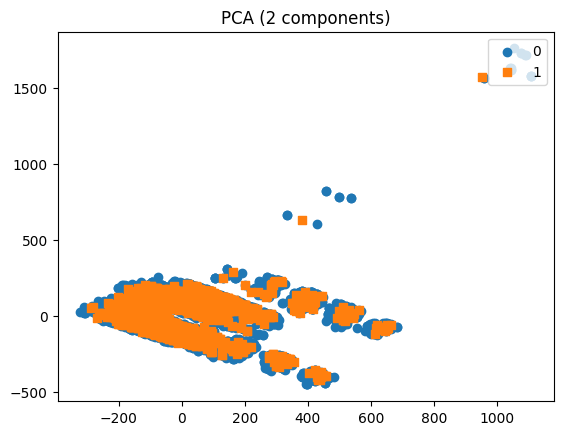

소요시간:114.63 초


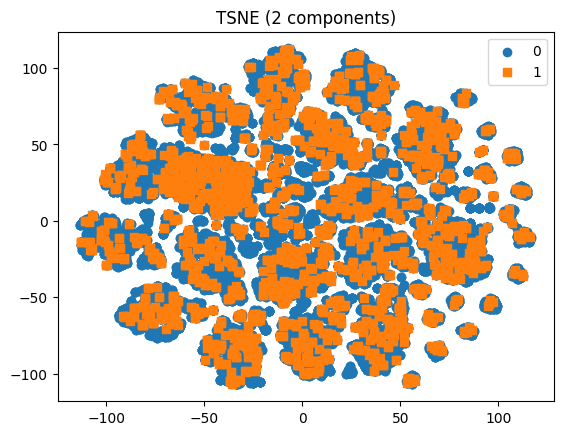

소요시간:0.17 초


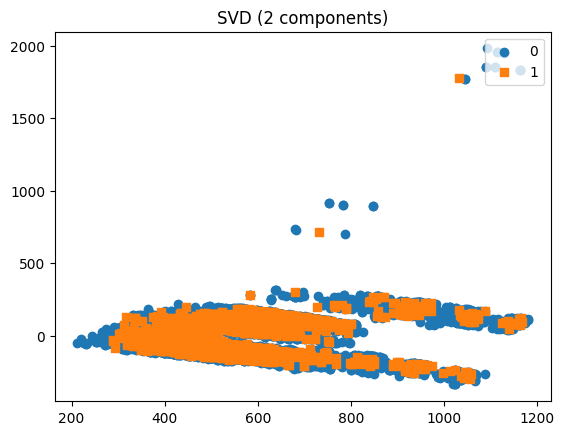

In [22]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=0)
svd = TruncatedSVD(n_components=2, random_state=0)

for tpl in [("PCA",pca) , ("TSNE",tsne), ("SVD",svd)]:
    t0 = time.time()
    dcompler_name = tpl[0]
    dcompler = tpl[1]
    X_train_dcom = dcompler.fit_transform(X_train)
    t1 = time.time()
    print(f"소요시간:{ (t1 - t0):.2f} 초")
    my_pca_scater(X_train_dcom , y_train, f'{dcompler_name} (2 components)')


# 공통함수

In [23]:
x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def exam_my_scatter_view(X, y, title="", df_yn=False):
    
    if bool(df_yn) :
        plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
        plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

In [24]:
from sklearn.decomposition import PCA

def my_scatter_view(X_train, y_train, X_sampling, y_sampling, label='Imbalanced dataset (2 PCA components)'):   
    y_sampling.value_counts().plot(kind='bar', title='Count (target)', figsize=(3,2));
    plt.show()
    
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    
    pca = PCA(n_components=2)
    X_sampling_pca = pca.fit_transform(X_sampling)
    
    
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(11,4))
   
    for l, c, m in zip(np.unique(y_train), colors, markers):
        ax1.scatter(
            X_train_pca[y_train==l, 0],
            X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m
        )
    for l, c, m in zip(np.unique(y_train), colors, markers):
        ax2.scatter(
            X_sampling_pca[y_sampling==l, 0],
            X_sampling_pca[y_sampling==l, 1],
            c=c, label=l, marker=m
        )
   
    ax1.set_title('original')
    ax2.set_title('sampling')
    plt.legend(loc='upper right')
    plt.show()
    

In [25]:
def my_score(X, y) :
    # X = df_train[labels]
    # y = df_train['전화해지여부']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    accuracy  = accuracy_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    auc       = roc_auc_score(y_test, y_proba[:, 1])
    print(f"Accuracy:{accuracy:.4f} F1:{f1:.4f} Precision:{precision:.4f} Recall:{recall:.4f} Auc:{auc:.4f} ")
    
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:\n', cm)
    
    return np.round(accuracy,4),  np.round(recall,4), np.round(precision,4), np.round(f1,4), np.round(auc,4), cm


In [26]:
def my_iqr_outlier(df_train, col) : 
    #fraud = df_train[col].loc[df_train['전화해지여부'] == 1].values
    fraud_values = df_train[col].loc[df_train['전화해지여부'] == 0].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off,  q75 + cut_off
    
    print(f'q25:{q25}  q75:{q75}  IQR:{iqr}  cut_off:{cut_off}  lower:{lower} upper:{upper}')
    
    outliers = [x for x in fraud_values if x < lower or x > upper]
    print(f'Outliers: {len(outliers)},  {outliers[:5]} ... ')

    drop_idx  = df_train[ (df_train[col] > upper) | (df_train[col] < lower) ].index
    print(f"{len(drop_idx)} row  삭제")
    #df_train = df_train.drop(drop_idx, axis=0)
    print("---"*20)
    

# 전역 변수

In [27]:
my_score_eval_list = []
accuracy,  recall, precision, f1, auc, cm = my_score(X, y)
my_score_eval_list.append( ["Orig", "Orig", accuracy,  recall, precision, f1, auc, cm, 0 ] )
my_score_eval_list

Accuracy:0.8894 F1:0.5052 Precision:0.5136 Recall:0.4971 Auc:0.7184 
Confusion matrix:
 [[5031  323]
 [ 345  341]]


[['Orig',
  'Orig',
  0.8894,
  0.4971,
  0.5136,
  0.5052,
  0.7184,
  array([[5031,  323],
         [ 345,  341]], dtype=int64),
  0]]

# <font size=6><b> 언더샘플링

## RandomUnderSampler

In [28]:
from imblearn.under_sampling import RandomUnderSampler

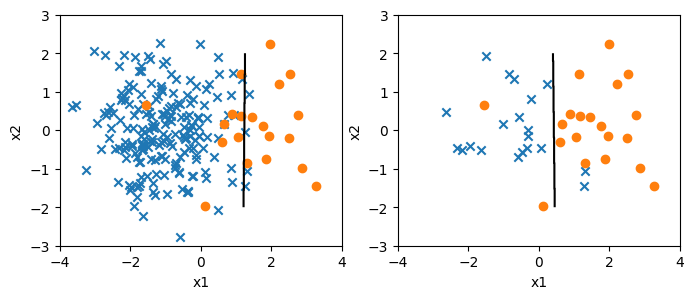

In [29]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)

plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Pandas sample(N개)

0    3318
1    3318
Name: 전화해지여부, dtype: int64


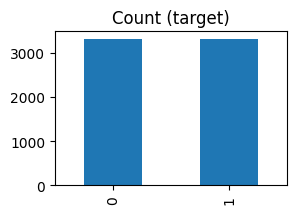

In [30]:
train_c0_under = train_c0.sample(train_c1_cnt)
train_under = pd.concat([train_c0_under, train_c1], axis=0)

print(train_under['전화해지여부'].value_counts())
train_under['전화해지여부'].value_counts().plot(kind='bar', title='Count (target)', figsize=(3,2));

* Python RandomUnderSampler()

Accuracy:0.7063 F1:0.7137 Precision:0.7043 Recall:0.7232 Auc:0.7061 
Confusion matrix:
 [[452 204]
 [186 486]]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


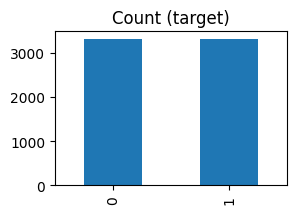

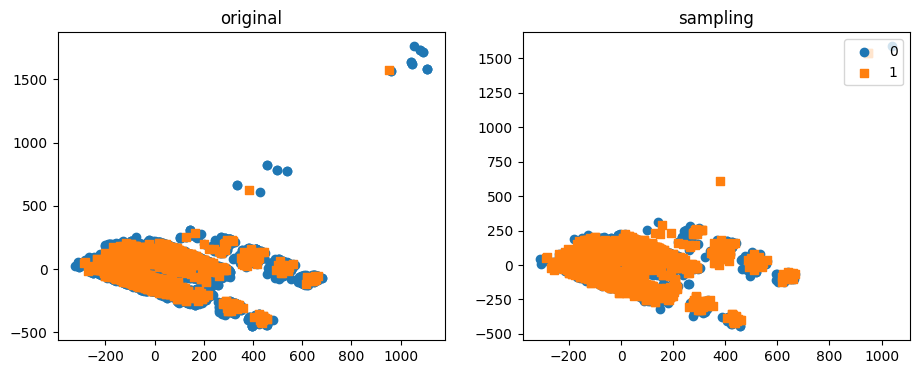

In [31]:
sm = RandomUnderSampler()

t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "RandomUnderSampler", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X_train, y_train, X_samp, y_samp, 'RandomUnderSampler')

## Tomek link
* 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2">

In [32]:
from imblearn.under_sampling import TomekLinks

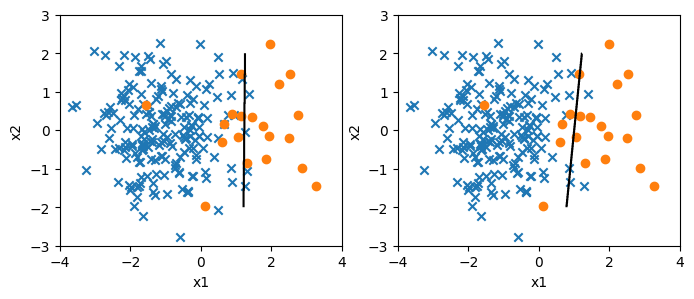

In [33]:
X_samp, y_samp = TomekLinks().fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)

plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python TomekLinks()

Accuracy:0.9060 F1:0.5974 Precision:0.6071 Recall:0.5880 Auc:0.7684 
Confusion matrix:
 [[4929  266]
 [ 288  411]]
29469 rows Removed indexes:  [    0     1     2 ... 30197 30198 30199]
0    26151
1     3318
Name: 전화해지여부, dtype: int64


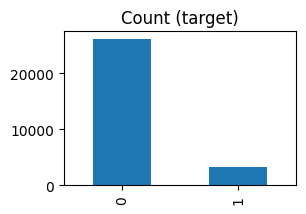

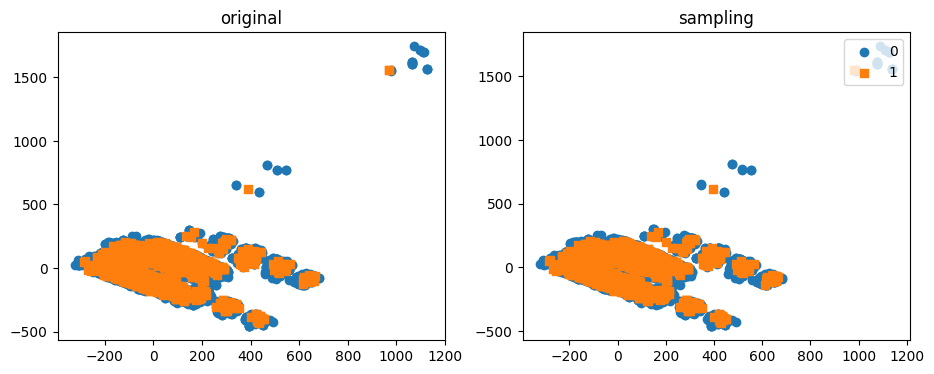

In [34]:
sm = TomekLinks(sampling_strategy='auto')  #majority'

t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "TomekLinks", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y,  X_samp, y_samp , 'TomekLinks UnderSampler')

## CNN(Condensed Nearest Neighbour)
*  최근접인 클래스 분포 데이터를 삭제하면서 샘플링하는 방법
<pre>
1. 분포가 작은 클래스르 S분포로 둡니다.
2. 분포가 큰 클래스를 랜덤으로 하나 선택한 뒤 그 데이터 위치에서 가장 가까운 데이터를 선택했을 때 S 분포에 포함 되어 있지 않은 데이터라면 제거합니다.
3. 가장 가까운 값이 S분포가 나올 때까지 2번을 반복합니다.

In [35]:
from imblearn.under_sampling import CondensedNearestNeighbour

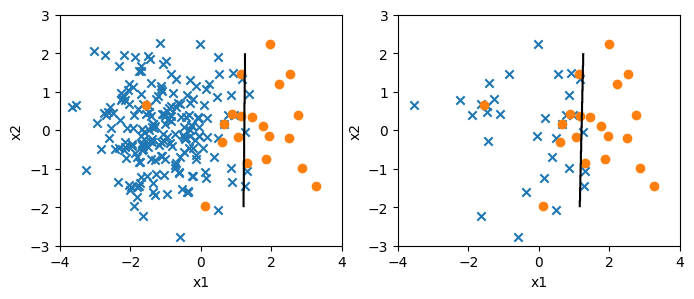

In [36]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python CNN CondensedNearestNeighbour()
** 너무~~~~ 느리다 **

In [37]:
# sm = CondensedNearestNeighbour(sampling_strategy='auto', random_state=0)

# t0 = time.time()
# X_samp, y_samp = sm.fit_resample(X, y)
# t1 = time.time()
# accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
# my_score_eval_list.append( ["Under", "CNN CondensedNearestNeighbour", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


# # print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
# print( y_samp.value_counts() )

# my_scatter_view(X, y, X_samp, y_samp, 'CNN CondensedNearestNeighbour UnderSampler')

## ENN (Edited Nearest Neighbours)
* KNN방식이랑 비슷하며 소수 클래스 주변의 다중 클래스 값을 제거하는 방법

In [38]:
from imblearn.under_sampling import EditedNearestNeighbours

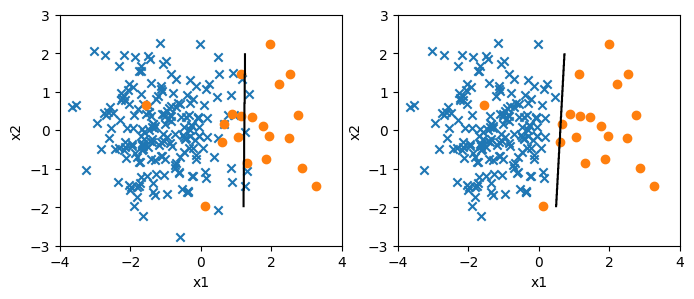

In [39]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python ENN (Edited Nearest Neighbours)

Accuracy:0.9142 F1:0.7012 Precision:0.7270 Recall:0.6771 Auc:0.8164 
Confusion matrix:
 [[3828  178]
 [ 226  474]]
0    20211
1     3318
Name: 전화해지여부, dtype: int64


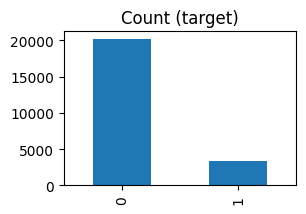

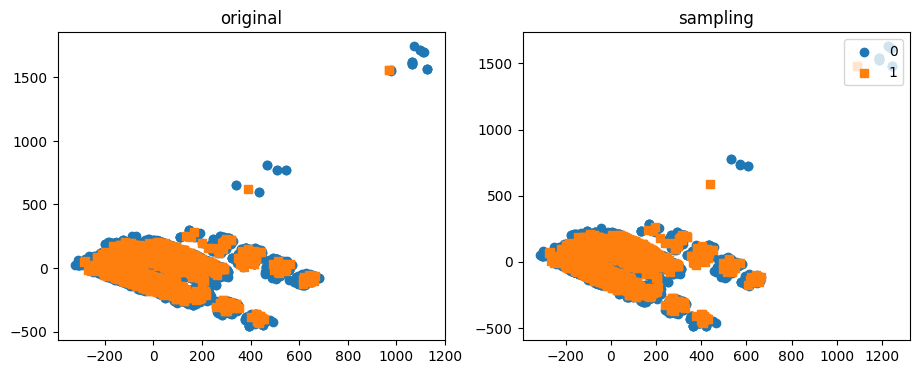

In [40]:
sm = EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=5)


t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "ENN(EditedNearestNeighbours)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp , 'ENN(Edited Nearest Neighbours) UnderSampler')

##  One sided Selection (2+3 Tomek link  + CNN)
* 토멕링크로 먼저 데이터를 제거한 후 분포가 큰 클래스 내부에서 CNN방법으로 데이터를 데이터를 제거하는 과정을 거치는 방법

In [41]:
from imblearn.under_sampling import OneSidedSelection

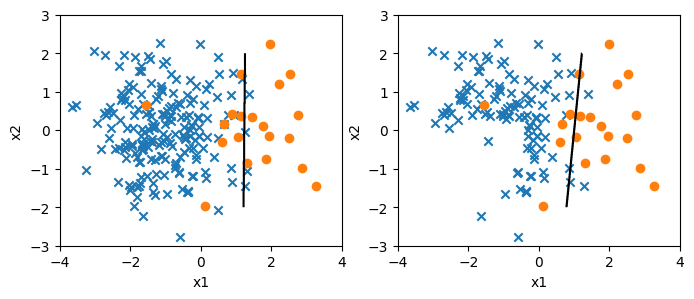

In [42]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python One sided Selection (2+3 Tomek link  + CNN)

Accuracy:0.9031 F1:0.5811 Precision:0.5756 Recall:0.5867 Auc:0.7654 
Confusion matrix:
 [[4927  292]
 [ 279  396]]
0    26151
1     3318
Name: 전화해지여부, dtype: int64


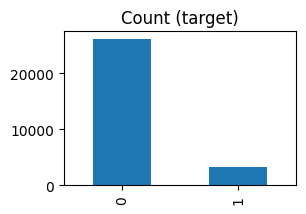

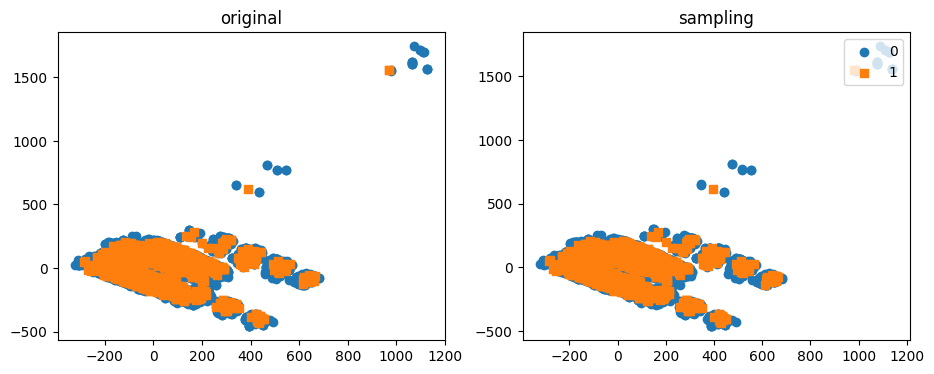

In [43]:
sm = OneSidedSelection(sampling_strategy='auto', random_state=0, n_neighbors=5, n_seeds_S=1)


t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "OneSidedSelection(2+3 Tomek + CNN)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp , 'One sided Selection(2+3 Tomek  + CNN) UnderSampler')

## Neighbourhood Cleansing Rule (3+4 CNN+ENN)
* 분포가 큰 데이터에 대한 제거 효과가 크지 않지만 좀 더 직관적으로 두 클래스를 나눌 수 있는 장점

In [44]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

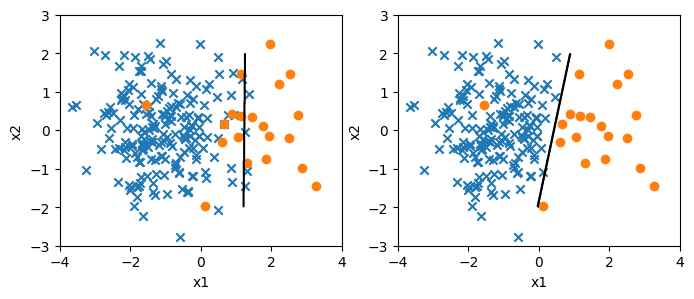

In [45]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python Neighbourhood Cleansing Rule (CNN+ENN)

Accuracy:0.9009 F1:0.6242 Precision:0.6193 Recall:0.6292 Auc:0.7855 
Confusion matrix:
 [[3947  244]
 [ 234  397]]
0    20788
1     3318
Name: 전화해지여부, dtype: int64


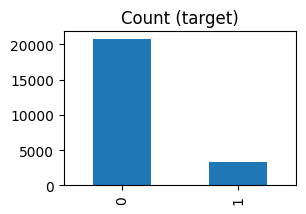

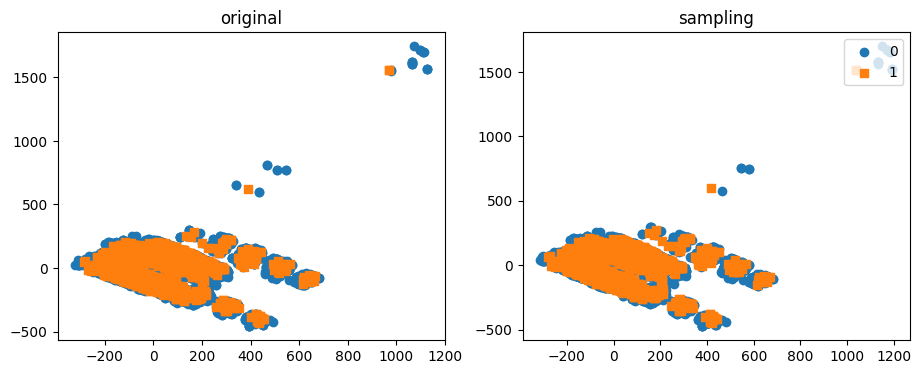

In [46]:
sm = NeighbourhoodCleaningRule(sampling_strategy='auto', n_neighbors=5, kind_sel='all', threshold_cleaning=0.5)

t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "Neighbourhood Cleansing Rule (3+4 CNN+ENN)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp , 'Neighbourhood Cleansing Rule (3+4 CNN+ENN)')

## Cluster Centroids
* 연산량, 연산시간이 매우 크다 (느리다)

* Python ClusterCentroids()

In [47]:
from imblearn.under_sampling import ClusterCentroids

In [48]:
# sm = ClusterCentroids(sampling_strategy='auto',random_state=0, voting='soft') #estimator=KMeans
# t0 = time.time()
# X_samp, y_samp = sm.fit_resample(X, y)
# t1 = time.time()
# accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
# my_score_eval_list.append( ["Under", "ClusterCentroids", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# # print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
# print( y_samp.value_counts() )

# my_scatter_view(X, y, X_samp, y_samp, 'ClusterCentroids UnderSampler')

# <font size=6><b> 오버샘플링

## Random Over Sampling
* 무작위로 분포가 작은 클래스의 데이터를 생성하는 방법

In [49]:
from imblearn.over_sampling import RandomOverSampler

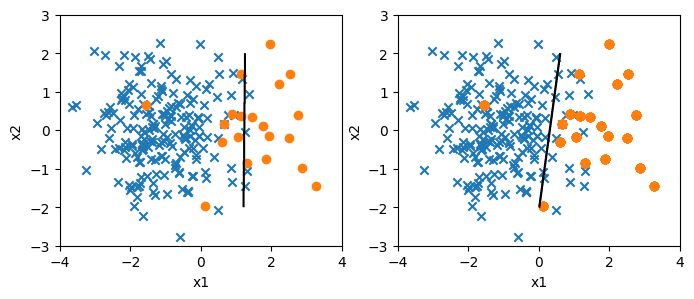

In [50]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python RandomOverSampler()

Accuracy:0.9661 F1:0.9673 Precision:0.9370 Recall:0.9996 Auc:0.9661 
Confusion matrix:
 [[5007  362]
 [   2 5382]]
0    26882
1    26882
Name: 전화해지여부, dtype: int64


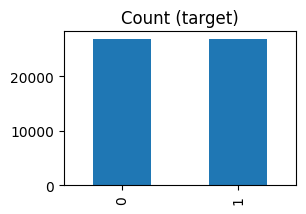

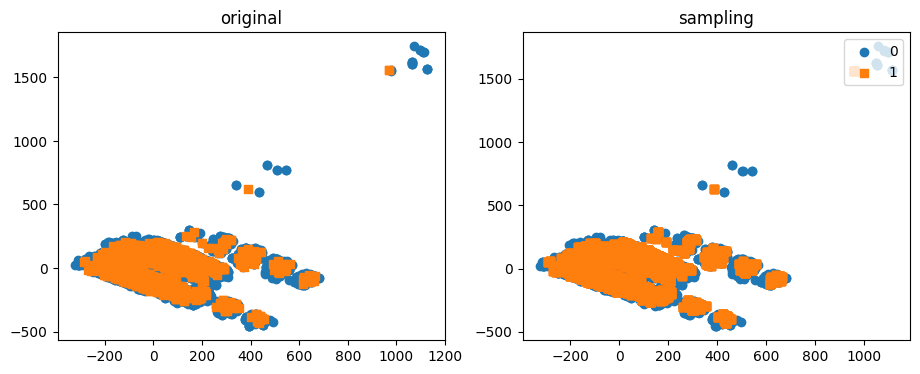

In [51]:
sm = RandomOverSampler()

t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over", "RandomOverSampler", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp, 'RandomOverSampler')

## ADASYN(Adaptive Synthetic Sampling) 
*  분포가 작은 클래스 데이터와 그 데이터와 가장 가까운 무작위의 K개의 데이터 사이에 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성하는 방법

In [52]:
from imblearn.over_sampling import ADASYN

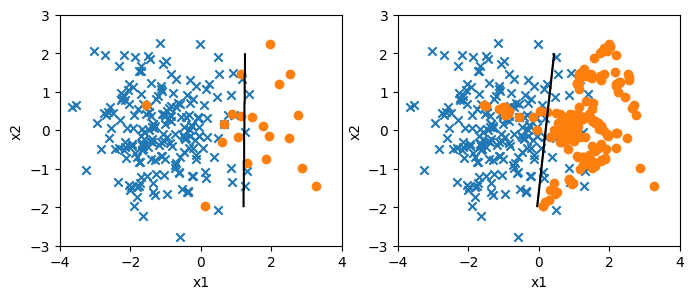

In [53]:
X_samp, y_samp = ADASYN(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python ADASYN(Adaptive Synthetic Sampling)

Accuracy:0.8837 F1:0.8875 Precision:0.8721 Recall:0.9035 Auc:0.8834 
Confusion matrix:
 [[4621  732]
 [ 533 4992]]
1    27506
0    26882
Name: 전화해지여부, dtype: int64


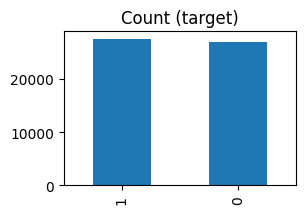

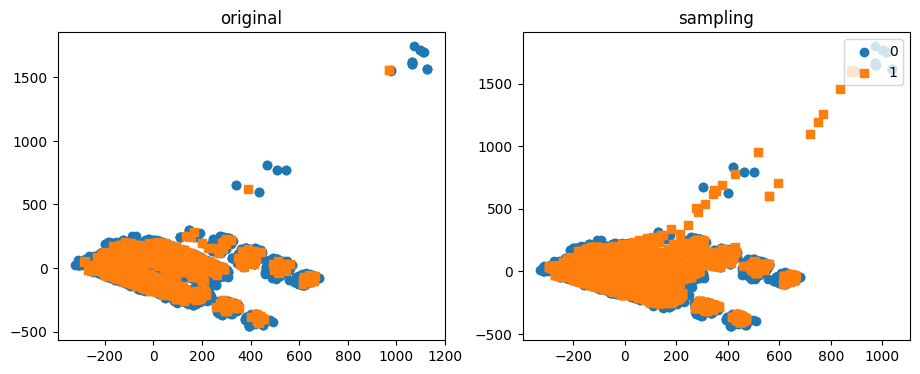

In [54]:
sm = ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)
t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over", "ADASYN(Adaptive Synthetic Sampling)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'ADASYN(Adaptive Synthetic Sampling) OverSampler')

## SMOTE
* ADASYN과 같은 방법론으로 데이터를 생성하지만 생성된 데이터가 분포가 적은 클래스에 포함되는 것이 아니라 분류 모형에 따라서 다르게 분류

In [55]:
from imblearn.over_sampling import SMOTE

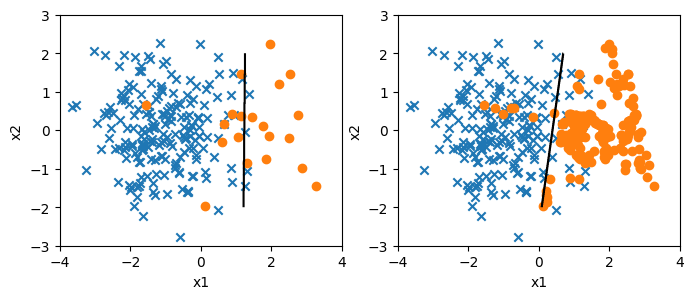

In [56]:
X_samp, y_samp = SMOTE(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python SMOTE()

Accuracy:0.8935 F1:0.8949 Precision:0.8846 Recall:0.9055 Auc:0.8935 
Confusion matrix:
 [[4733  636]
 [ 509 4875]]
0    26882
1    26882
Name: 전화해지여부, dtype: int64


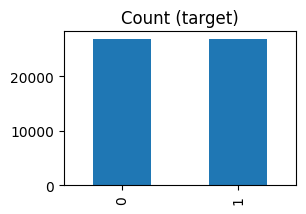

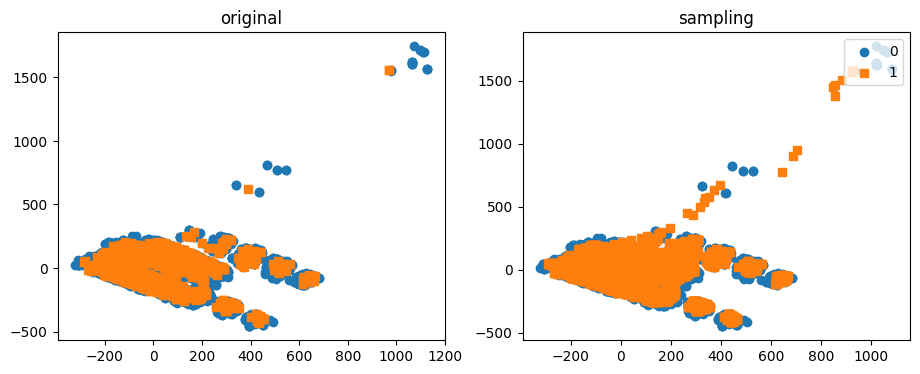

In [57]:
sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over", "SMOTE", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'SMOTE OverSampler')

# <font size=6><b> 복합 샘플링
* Combine Sampling : 오버샘플링 + 언더샘플링 결합

## SMOTEENN (SMOTE + ENN)
* 오버(SMOTE) + 언더(ENN)

In [58]:
from imblearn.combine import SMOTEENN

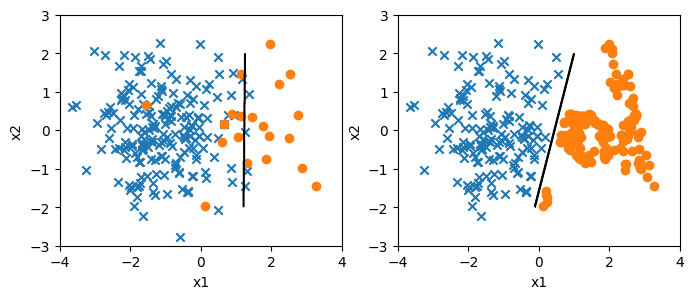

In [59]:
X_samp, y_samp = SMOTEENN(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python SMOTEENN (SMOTE + ENN)

Accuracy:0.8934 F1:0.8856 Precision:0.8735 Recall:0.8979 Auc:0.8937 
Confusion matrix:
 [[4789  595]
 [ 467 4109]]
0    26882
1    22918
Name: 전화해지여부, dtype: int64


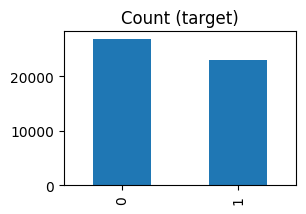

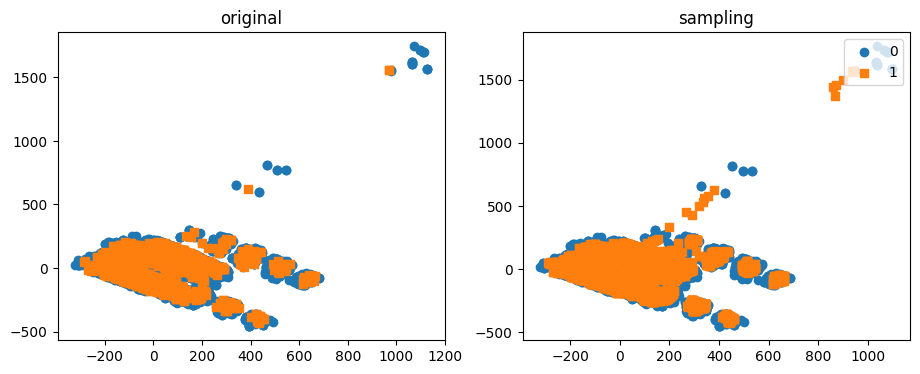

In [60]:
smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
enn   = EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=5)

sm = SMOTEENN(sampling_strategy='auto', random_state=0, smote=smote, enn=enn)
t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over+Under", "SMOTEENN (SMOTE + ENN)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'SMOTEENN (SMOTE + ENN) Over+Under')

## SMOTETomek(SMOTE + TOMEK)
* 오버(SMOTE) + 언더(TOMEK)

In [61]:
from imblearn.combine import SMOTETomek

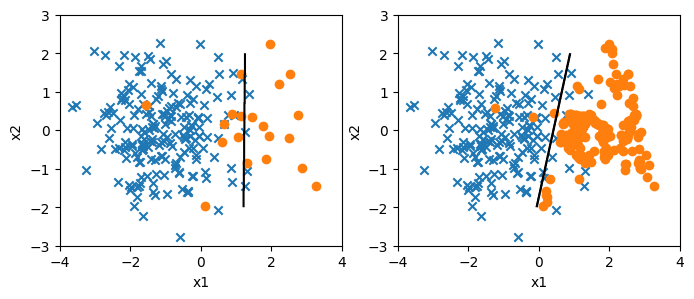

In [62]:
X_samp, y_samp = SMOTETomek(random_state=0).fit_resample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python SMOTETomek(SMOTE + TOMEK)

Accuracy:0.8892 F1:0.8898 Precision:0.8829 Recall:0.8969 Auc:0.8892 
Confusion matrix:
 [[4728  636]
 [ 551 4794]]
0    26882
1    26662
Name: 전화해지여부, dtype: int64


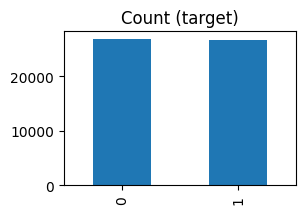

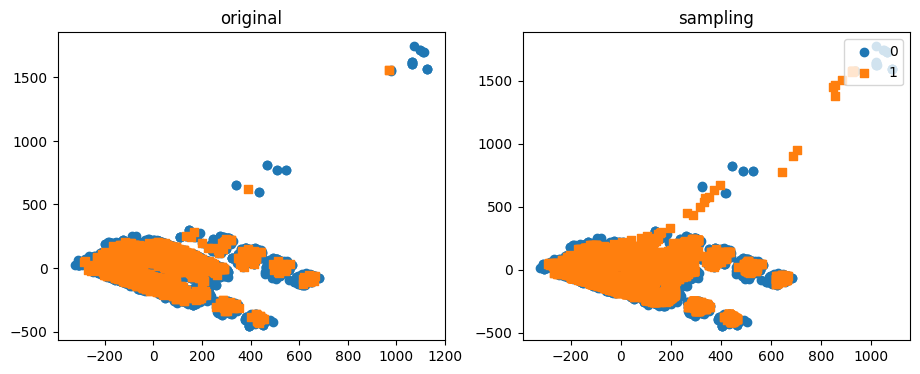

In [63]:
smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
tomek = TomekLinks(sampling_strategy='auto') 

sm = SMOTETomek(sampling_strategy='auto', random_state=0, smote=smote, tomek=tomek)
t0 = time.time()
X_samp, y_samp = sm.fit_resample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over+Under", "SMOTETomek(SMOTE + TOMEK)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_samp.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'SMOTETomek(SMOTE + TOMEK) Over+Under')

In [64]:
# my_score_eval_list.append( ["Over+Under", "SMOTETomek(SMOTE + TOMEK)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )
score_df = pd.DataFrame(my_score_eval_list, columns=['type','model','accuracy','recall','precision','f1','auc','cm','runtime'])
score_df.head()

,type,model,accuracy,recall,precision,f1,auc,cm,runtime
0,Orig,Orig,0.8894,0.4971,0.5136,0.5052,0.7184,"[[5031, 323], [345, 341]]",0.00
1,Under,RandomUnderSampler,0.7063,0.7232,0.7043,0.7137,0.7061,"[[452, 204], [186, 486]]",0.02
2,Under,TomekLinks,0.9060,0.5880,0.6071,0.5974,0.7684,"[[4929, 266], [288, 411]]",0.79
3,Under,ENN(EditedNearestNeighbours),0.9142,0.6771,0.7270,0.7012,0.8164,"[[3828, 178], [226, 474]]",2.19
4,Under,OneSidedSelection(2+3 Tomek + CNN),0.9031,0.5867,0.5756,0.5811,0.7654,"[[4927, 292], [279, 396]]",2.68


In [65]:
score_df.to_csv("./score_df.csv", index=False)

In [66]:
score_df.sort_values('f1', ascending=False)

,type,model,accuracy,recall,precision,f1,auc,cm,runtime
6,Over,RandomOverSampler,0.9661,0.9996,0.9370,0.9673,0.9661,"[[5007, 362], [2, 5382]]",0.03
8,Over,SMOTE,0.8935,0.9055,0.8846,0.8949,0.8935,"[[4733, 636], [509, 4875]]",0.13
10,Over+Under,SMOTETomek(SMOTE + TOMEK),0.8892,0.8969,0.8829,0.8898,0.8892,"[[4728, 636], [551, 4794]]",1.52
7,Over,ADASYN(Adaptive Synthetic Sampling),0.8837,0.9035,0.8721,0.8875,0.8834,"[[4621, 732], [533, 4992]]",0.49
9,Over+Under,SMOTEENN (SMOTE + ENN),0.8934,0.8979,0.8735,0.8856,0.8937,"[[4789, 595], [467, 4109]]",1.23
1,Under,RandomUnderSampler,0.7063,0.7232,0.7043,0.7137,0.7061,"[[452, 204], [186, 486]]",0.02
3,Under,ENN(EditedNearestNeighbours),0.9142,0.6771,0.7270,0.7012,0.8164,"[[3828, 178], [226, 474]]",2.19
5,Under,Neighbourhood Cleansing Rule (3+4 CNN+ENN),0.9009,0.6292,0.6193,0.6242,0.7855,"[[3947, 244], [234, 397]]",3.77
2,Under,TomekLinks,0.9060,0.5880,0.6071,0.5974,0.7684,"[[4929, 266], [288, 411]]",0.79
4,Under,OneSidedSelection(2+3 Tomek + CNN),0.9031,0.5867,0.5756,0.5811,0.7654,"[[4927, 292], [279, 396]]",2.68
